# Loading the Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_house_data.csv')

In [3]:
data.head()

,house_id,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,house_9442,Super built-up Area,Ready To Move,Abbigere,2 BHK,SLtias,795,2.0,1.0,32.54
1,house_2578,Super built-up Area,Ready To Move,Mallasandra,2 BHK,NaN,1340,2.0,2.0,61.00
2,house_8279,Super built-up Area,Ready To Move,Sector 2 HSR Layout,3 BHK,NDpalSe,1512,3.0,NaN,80.00
3,house_1584,Super built-up Area,19-Dec,Hoodi,3 BHK,Caycend,1512,3.0,2.0,75.77
4,house_4516,Plot Area,Ready To Move,RMV 2nd Stage,3 Bedroom,NaN,4470,3.0,NaN,700.00


In [4]:
data.shape

(10656, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  object 
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   society       6253 non-null   object 
 6   total_sqft    10656 non-null  object 
 7   bath          10596 non-null  float64
 8   balcony       10189 non-null  float64
 9   price         10656 non-null  float64
dtypes: float64(3), object(7)
memory usage: 832.6+ KB


In [6]:
data = data.drop('society', axis = 1)
# society has several missing values which is difficult to compensate, hence dropping it as a feature

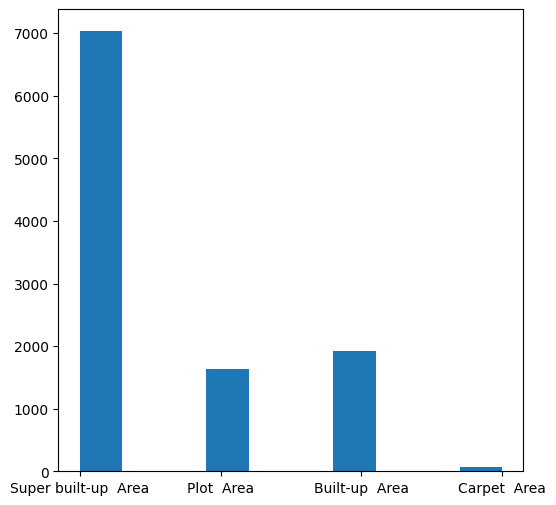

In [7]:
plt.figure(figsize=(6,6))
plt.hist(data['area_type'])
plt.show()

In [8]:
data.availability.value_counts()

Ready To Move    8451
18-Dec            256
18-May            246
18-Apr            211
18-Aug            153
                 ... 
15-Jun              1
17-Jan              1
15-Dec              1
14-Nov              1
17-Feb              1
Name: availability, Length: 75, dtype: int64

# Data Cleaning

In [9]:
data['availability'] = data.availability.apply(lambda x: x if x == 'Ready To Move' else 'Currently Not')
# converting a featuref from a mixture of numbers and text to just text for ease

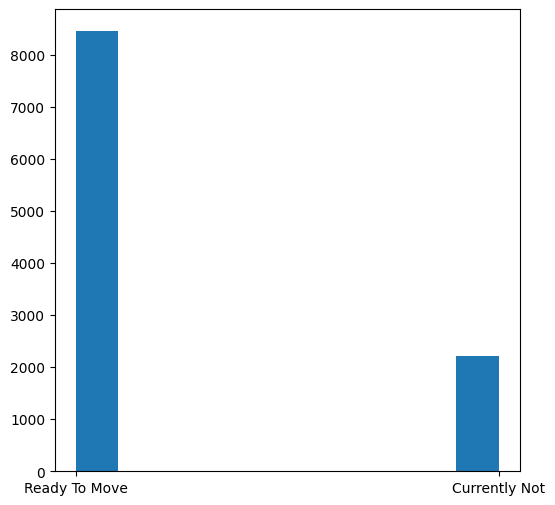

In [10]:
plt.figure(figsize=(6,6))
plt.hist(data['availability'])
plt.show()

In [11]:
data['availability'] = pd.get_dummies(data['availability'], drop_first=True)
# performing one-hot encoding to prepare the categorical data 

In [12]:
data.shape

(10656, 9)

In [13]:
data.isnull().sum()

house_id          0
area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             60
balcony         467
price             0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  uint8  
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   total_sqft    10656 non-null  object 
 6   bath          10596 non-null  float64
 7   balcony       10189 non-null  float64
 8   price         10656 non-null  float64
dtypes: float64(3), object(5), uint8(1)
memory usage: 676.5+ KB


In [15]:
def convert_to_bedroom(x):
    s = str(x).split(' ')[0]
    return s

# obtanining the number of bedrooms from the feature consisting of numbers and text

In [16]:
data['BHK'] = data['size'].apply(convert_to_bedroom)

In [18]:
type(data['BHK'].mode())

pandas.core.series.Series

In [17]:
a = data['BHK'].mode().iloc[0]
# selecting the most commonly occuring value in the BHK column

In [19]:
data['BHK'] = data['BHK'].apply(lambda x: a if x == 'nan' else x)
# filling the missing values for the BHK column

In [20]:
data['BHK'] = data['BHK'].apply(lambda x: float(x))

In [21]:
data.shape

(10656, 10)

In [22]:
type(data['total_sqft'][2])

str

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
data['total_sqft'][~data['total_sqft'].apply(is_float)]
# filtering the 'total_sqft' column to only those rows whose values are NOT floats, likely strings or non-numeric values

26       547.34 - 827.31
119          1200 - 2400
131          1100 - 1225
167          1660 - 1805
251          2830 - 2882
              ...       
10529          520 - 645
10577        1255 - 1350
10579        1020 - 1130
10635        2800 - 2870
10650          615 - 985
Name: total_sqft, Length: 204, dtype: object

In [25]:
def conversion(data):
    a = data.split('-')
    if len(a) == 2:
        return (float(a[0]) + float(a[1]))/2
    try:
        return float(data)
    except:
        return None
    
# converting the range of area to te average area in 'total_sqft'

In [26]:
data['total_sqft'] = data['total_sqft'].apply(conversion)

In [27]:
data['total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10656 entries, 0 to 10655
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
10623 non-null  float64
dtypes: float64(1)
memory usage: 83.4 KB


In [28]:
num_col = ['total_sqft','bath','balcony']

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy='median')
data[num_col] = imputer.fit_transform(data[num_col])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      10656 non-null  object 
 1   area_type     10656 non-null  object 
 2   availability  10656 non-null  uint8  
 3   location      10656 non-null  object 
 4   size          10640 non-null  object 
 5   total_sqft    10656 non-null  float64
 6   bath          10656 non-null  float64
 7   balcony       10656 non-null  float64
 8   price         10656 non-null  float64
 9   BHK           10656 non-null  float64
dtypes: float64(5), object(4), uint8(1)
memory usage: 759.8+ KB


Handling Categorical Column

In [32]:
data['location'].unique()

array(['Abbigere', 'Mallasandra', 'Sector 2 HSR Layout', ...,
       'BDS Layout', 'Hoskote near', 'Kalasipalya'], dtype=object)

In [33]:
data.location.value_counts()

Whitefield              445
Sarjapur  Road          318
Electronic City         246
Kanakpura Road          212
Thanisandra             184
                       ... 
Sahyadri Layout           1
Kothnoor Dinne            1
JP Nagar 7th Phase,       1
Sampigehalli              1
Kalasipalya               1
Name: location, Length: 1196, dtype: int64

In [34]:
location_value_less_than_10 = data.location.value_counts()[data.location.value_counts() < 10]

In [35]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_value_less_than_10 else x)
# placing location with less than 10 occurences under one category

In [36]:
data.shape

(10656, 10)

In [37]:
df = pd.DataFrame(data['location'].unique())

In [38]:
df[0]
df['Unique_Locations'] = df[0]
df.drop(0,axis=1,inplace=True)

In [39]:
df.head()

,Unique_Locations
0,Abbigere
1,Mallasandra
2,Sector 2 HSR Layout
3,Hoodi
4,other


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder_location = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_area = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [43]:
location_transform = pd.DataFrame(ohe_encoder_location.fit_transform(data[['location']]), columns=list(ohe_encoder_location.categories_[0]))

In [44]:
location_transform.shape

(10656, 221)

In [45]:
list(ohe_encoder_location.categories_[0])

[' Devarachikkanahalli',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Stage Nagarbhavi',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommasandra Industrial Area',
 'Bommenahalli',
 'Brookefield',
 'Budigere',
 'CV Raman Nagar',
 'Chamrajpet',
 'Chandapura',

In [46]:
len(list(ohe_encoder_location.categories_[0]))

221

In [47]:
data = pd.concat([data, location_transform], axis=1)

In [48]:
data.shape

(10656, 231)

In [49]:
data.location.isna().sum()

0

In [50]:
area_type_transform = pd.DataFrame(ohe_area.fit_transform(data[['area_type']]), columns=list(ohe_area.categories_[0]))

In [51]:
area_type_transform

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
10651,0.0,0.0,1.0,0.0
10652,0.0,0.0,1.0,0.0
10653,1.0,0.0,0.0,0.0
10654,1.0,0.0,0.0,0.0


In [52]:
data = pd.concat([data, area_type_transform], axis=1)

In [53]:
data.shape

(10656, 235)

In [54]:
data.head(2)

,house_id,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,house_9442,Super built-up Area,1,Abbigere,2 BHK,795.0,2.0,1.0,32.54,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,house_2578,Super built-up Area,1,Mallasandra,2 BHK,1340.0,2.0,2.0,61.00,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
data.drop('size',axis=1,inplace=True)

In [56]:
data['price_per_sqft'] = (data['price'] * 100000) / data['total_sqft']

In [57]:
corr = data.corr()
corr['price']

C:\Users\coolg\AppData\Local\Temp\ipykernel_1812\234052541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


availability            0.031507
total_sqft              0.562314
bath                    0.457050
balcony                 0.129154
price                   1.000000
                          ...   
Built-up  Area         -0.029426
Carpet  Area           -0.013515
Plot  Area              0.281201
Super built-up  Area   -0.187289
price_per_sqft          0.025446
Name: price, Length: 232, dtype: float64

# Outliers Detection

In [58]:
data.describe()

,availability,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
count,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,...,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000,1.065600e+04
mean,0.793074,1562.774237,2.691348,1.607451,112.617980,2.806025,0.000938,0.001032,0.001877,0.001971,...,0.016235,0.002909,0.001126,0.006381,0.233202,0.180743,0.006757,0.152778,0.659722,8.221334e+03
std,0.405121,1284.408163,1.335079,0.804315,142.661727,1.301843,0.030621,0.032114,0.043284,0.044351,...,0.126384,0.053861,0.033540,0.079632,0.422890,0.384823,0.081925,0.359790,0.473825,1.187561e+05
min,0.000000,1.000000,1.000000,0.000000,8.440000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.678298e+02
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.272562e+03
50%,1.000000,1280.000000,2.000000,2.000000,72.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.448497e+03
75%,1.000000,1683.000000,3.000000,2.000000,120.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.325783e+03
max,1.000000,52272.000000,40.000000,3.000000,2912.000000,43.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+07


<AxesSubplot: >

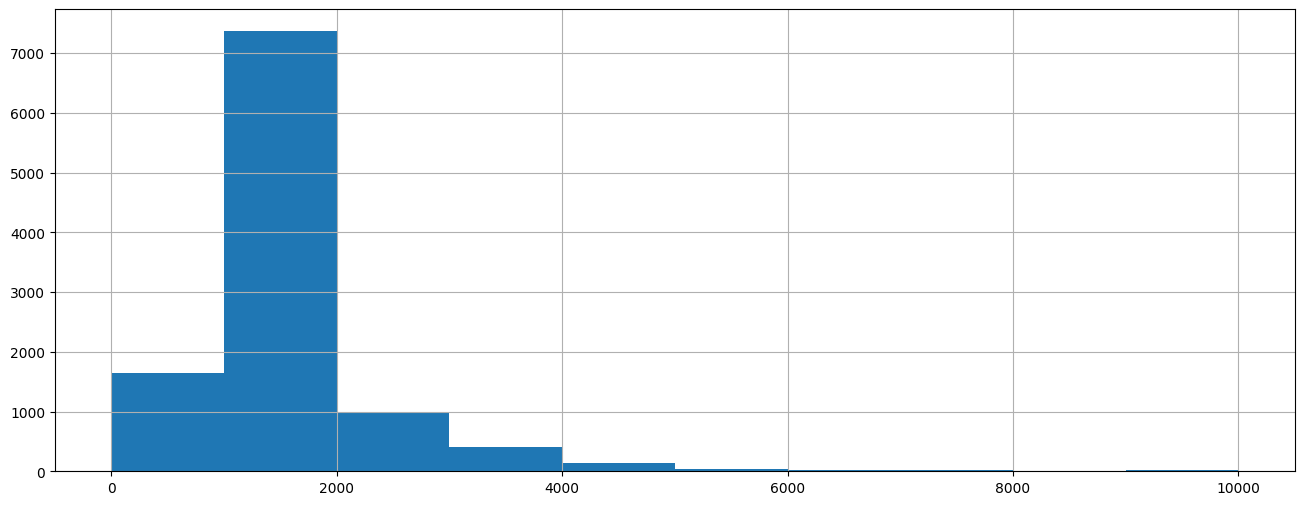

In [59]:
plt.figure(figsize=(16,6))
pd.cut(data['total_sqft'], bins= [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, np.inf], labels=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]).hist()

In [60]:
#df2 = df1.loc[df1['total_sqft']<=4000]

In [61]:
#df3 = df2.loc[df2['Bedroom'] <= 9]

<AxesSubplot: >

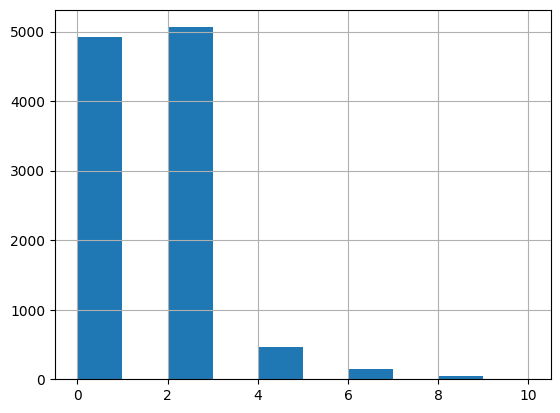

In [62]:
pd.cut(data['BHK'], bins=[0, 2, 4, 6, 8, 10, np.inf], labels=[0, 2, 4, 6, 8, 10]).hist()

In [63]:
data[data.total_sqft / data.BHK < 300].head()

,house_id,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
7,house_3418,Plot Area,1,Kumaraswami Layout,1270.0,4.0,1.0,128.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10078.740157
39,house_3511,Plot Area,1,Uttarahalli,1200.0,7.0,2.0,225.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18750.000000
41,house_6505,Plot Area,1,Yeshwanthpur,2400.0,6.0,2.0,270.0,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11250.000000
57,house_11518,Plot Area,1,Abbigere,1200.0,6.0,1.0,95.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7916.666667
63,house_13217,Plot Area,1,other,1200.0,3.0,2.0,125.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10416.666667


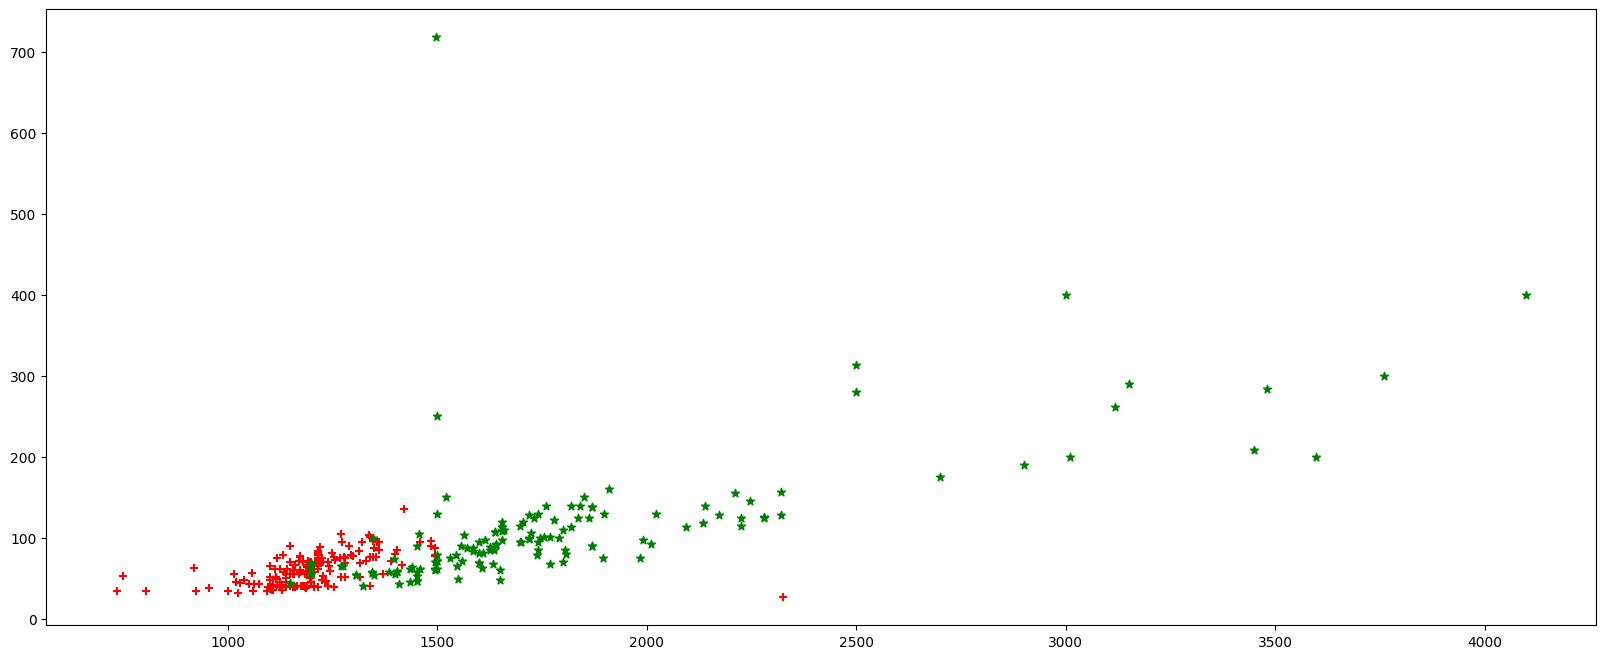

In [64]:
plt.figure(figsize=(20,8))
cond2 = ((data.location == 'Whitefield') & (data.BHK == 2))
cond3 = ((data.location == 'Whitefield') & (data.BHK == 3))
plt.scatter(data.loc[cond2, 'total_sqft'], data.loc[cond2, 'price'], marker ='+', color='red')
plt.scatter(data.loc[cond3, 'total_sqft'], data.loc[cond3, 'price'], marker ='*', color='green')
plt.show()

In [65]:
data.shape

(10656, 235)

In [66]:
df1 = data[~(data.total_sqft / data.BHK < 300)]

In [67]:
df1.shape

(10062, 235)

## Outlier Removing Using Std and mean

In [68]:
df1.price_per_sqft.describe()

count    10062.000000
mean      6314.451684
std       3905.578348
min        267.829813
25%       4212.025777
50%       5305.794343
75%       6932.530120
max      76923.076923
Name: price_per_sqft, dtype: float64

In [69]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [70]:
df2 = remove_price_per_sqft_outliers(df1)

In [71]:
df2.shape

(8209, 235)

In [72]:
df3 = df2.drop(['location','area_type'],axis=1)

In [73]:
df3.shape

(8209, 233)

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209 entries, 0 to 8208
Columns: 233 entries, house_id to price_per_sqft
dtypes: float64(231), object(1), uint8(1)
memory usage: 14.5+ MB


In [75]:
df3.head()

,house_id,availability,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
0,house_152,0,1250.0,2.0,3.0,44.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3520.000000
1,house_10582,1,991.0,2.0,2.0,40.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4036.326942
2,house_5030,1,1170.0,2.0,2.0,40.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3418.803419
3,house_11101,1,1700.0,3.0,1.0,71.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4176.470588
4,house_5771,1,1425.0,2.0,2.0,65.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4561.403509


# Model Prediction

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(df3.drop('price',axis=1),df3.price,test_size=0.2,random_state=42)

In [77]:
X_train_id = X_train.house_id
X_val_id = X_val.house_id

In [78]:
X_train = X_train.drop('house_id',axis=1)
X_train = X_train.drop('price_per_sqft',axis=1)

X_val = X_val.drop('price_per_sqft',axis=1)
X_val = X_val.drop('house_id',axis=1)

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6567 entries, 5900 to 7270
Columns: 230 entries, availability to Super built-up  Area
dtypes: float64(229), uint8(1)
memory usage: 11.5 MB


In [80]:
X_train.describe()

,availability,total_sqft,bath,balcony,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
count,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,...,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000
mean,0.786356,1504.714866,2.472666,1.612608,2.574539,0.001218,0.000761,0.001827,0.000609,0.002589,...,0.001370,0.016750,0.002893,0.000914,0.005939,0.241358,0.191716,0.006396,0.071265,0.730623
std,0.409910,895.868967,0.952164,0.789290,0.875189,0.034884,0.027585,0.042711,0.024674,0.050817,...,0.036998,0.128345,0.053715,0.030215,0.076840,0.427940,0.393681,0.079723,0.257287,0.443670
min,0.000000,300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1115.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1285.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1650.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,30400.000000,13.000000,3.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [83]:
predictions_lr = lr_clf.predict(X_val)

In [84]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_val, predictions_lr))

0.8381970437672919


In [85]:
lr_clf.score(X_val,y_val)

0.8381790253230075